In [1]:
import sys
import os

import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm, levy_stable, ks_2samp
sys.path.insert(1, os.sep.join(["..", "packages"]))
from Levy_processes import *
from basicDistributionFunctions import *


In [2]:
Image_width = 10

In [3]:
N = 10 ** 3
dt = 0.01
T = N * dt # = 10
M = 10 ** 3

t = np.linspace(0, 1, N)
ps = [0.1, 0.3, 0.5, 0.7, 0.9]

# Brownian Motion

# 1.5-stable simetric Levy motin

## quantile lines

In [4]:
alpha = 2
beta = 0

X_Brownian_motion = Levy_prcesses(T, M, N, 2, 0)

In [ ]:
fig_q, axs_q = plt.subplots(nrows = 1, ncols = 1, figsize = ( Image_width, Image_width))


Quantile = np.zeros([len(ps), N])
Quantile_teoretic = np.zeros([len(ps),N])

# for i in range()


for Np, p in enumerate(ps):
    for k in range(N):
        # print(len(equantile_proces(X.T, p)))
        Quantile[Np,:] = np.squeeze(equantile_proces(X_Brownian_motion.T, p))

    for k in range(len(ps)):
        Quantile_teoretic[Np,:] = levy_stable.ppf(p, 2, 0)
        # Quantile_teoretic[k,:] = Quantile_teoretic[k,:] * np.sqrt(T * k / M)

for k in range(N):
    Quantile_teoretic[:,k] = Quantile_teoretic[:,k] * ((T * k / N) ** (1 / alpha))
    # Quantile_teoretic[:,k] = np.squeeze(np.ones([len(ps), 1]) * norm.ppf(k / N))

print(axs_q)
ax_q = axs_q;
ax_q.plot(t, Quantile_teoretic.T);
ax_q.plot(t, Quantile.T);
ax_q.set_xlabel("time")
ax_q.set_title(f"Alpha = {alpha}, Beta = {beta}");


## self-similar

In [ ]:
c = 4

In [ ]:

N_scaled = int(c ** (-alpha) * N)

X1 = X_Brownian_motion[-1, :int(M//2)]
X2 = c * X_Brownian_motion[N_scaled, int(M//2):]

p_val = ks_2samp(X1, X2)
print(p_val)

## characteristic function

In [5]:
N_char = 10 ** 2
t_char = np.linspace(-3,3, N_char)


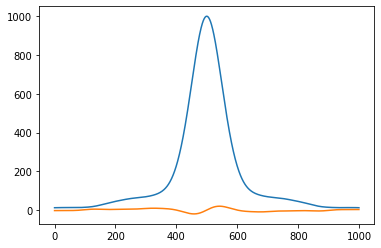

In [6]:
phi = characteristic_proces_r_i(t_char, X_Brownian_motion)

plt.plot(phi[0])
plt.plot(phi[1])


## TAMSD EAMSD (EATAMSD?)

In [5]:
X = X_Brownian_motion[:,0]
Y_TAMSD = np.zeros(N - 1)

for i in range( N - 1):
    Y_TAMSD[i] = TAMSD(X, i)

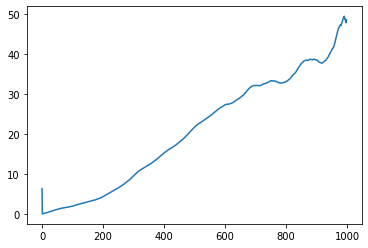

In [6]:
plt.plot(Y_TAMSD)

In [7]:
Y_EAMSD = np.zeros(N - 1)

for i in range( N - 1):
    Y_EAMSD[i] = EAMSD(X_Brownian_motion, i)


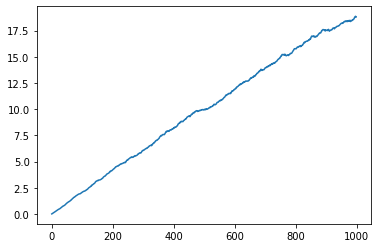

In [8]:
plt.plot(Y_EAMSD)

## Distribution

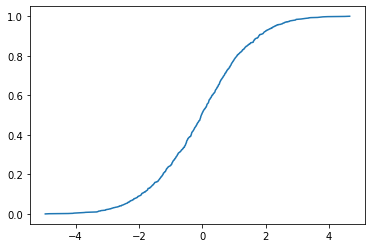

In [20]:
x = CDF2(X_Brownian_motion[100,:])[0]
plt.plot(x, np.linspace(0,1, len(x)));
